In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('Kannada-MNIST'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Kannada-MNIST\test.csv
Kannada-MNIST\train.csv


## Inspect datasets

In [4]:
import pandas as pd

train = pd.read_csv("Kannada-MNIST/train.csv")

train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Load image and label data

In [5]:
x_train = train.iloc[:, 1:].to_numpy()
y_train = train.iloc[:, 0].to_numpy()

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


## Plot an image

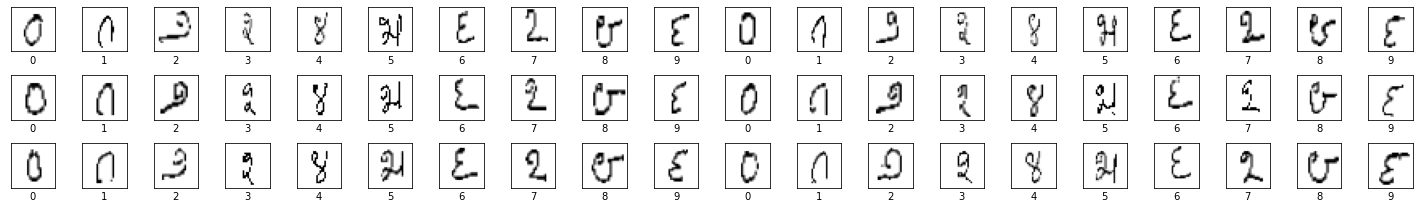

In [14]:
i = 0
plt.figure(figsize=(20,3))
for i in range(60):
    plt.subplot(3, 20, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
plt.tight_layout()
plt.show()

# Baseline Model - logistic regression

In [8]:
# scale and convert dtype

x_train = x_train/255.
x_train = x_train.astype("float32")

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

mlp = Sequential([
    Dense(10, input_shape = (784, ), activation = "softmax")
])

mlp.compile(loss = "sparse_categorical_crossentropy",
            optimizer = "sgd",
            metrics = ["accuracy"])

history = mlp.fit(x_train, y_train, epochs = 15, validation_split = 0.1)

Epoch 1/15
1688/1688 [==============================] - 5s 2ms/step - loss: 2.3025 - accuracy: 0.1029 - val_loss: 2.3024 - val_accuracy: 0.1172
Epoch 2/15
1688/1688 [==============================] - 2s 954us/step - loss: 2.3024 - accuracy: 0.1054 - val_loss: 2.3022 - val_accuracy: 0.1375
Epoch 3/15
1688/1688 [==============================] - 1s 870us/step - loss: 2.3022 - accuracy: 0.1126 - val_loss: 2.3019 - val_accuracy: 0.0928
Epoch 4/15
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3019 - accuracy: 0.1062 - val_loss: 2.3017 - val_accuracy: 0.1958
Epoch 5/15
1688/1688 [==============================] - 2s 922us/step - loss: 2.3018 - accuracy: 0.1222 - val_loss: 2.3015 - val_accuracy: 0.0998
Epoch 6/15
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3016 - accuracy: 0.1204 - val_loss: 2.3013 - val_accuracy: 0.1475
Epoch 7/15
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3014 - accuracy: 0.1490 - val_loss: 2.3011 - val_acc

<Figure size 432x288 with 0 Axes>

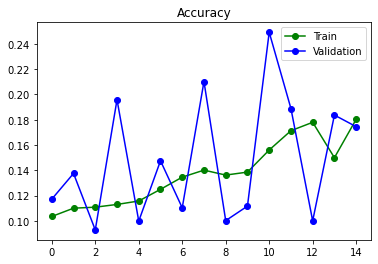

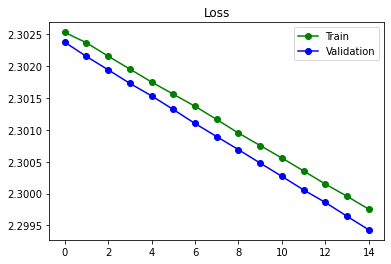

<Figure size 432x288 with 0 Axes>

In [10]:
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, "o-g", label = "Train")
plt.plot(epochs, val_acc, "o-b", label = "Validation")
plt.title("Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, "o-g", label = "Train")
plt.plot(epochs, val_loss, "o-b", label = "Validation")
plt.title("Loss")
plt.legend()
plt.figure()

## Simple CNN

In [11]:
x_train = x_train.reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_train.dtype)

(60000, 28, 28, 1)
float32


In [12]:
simple_model = Sequential([
                Conv2D(filters = 32, kernel_size = (5, 5), padding = "same", input_shape = (28, 28, 1),
                      activation = "relu"),
                MaxPooling2D(),
                Conv2D(filters = 64, kernel_size = (3, 3), padding = "same",
                      activation = "relu"),
                MaxPooling2D(),
                Flatten(),
                Dense(256, activation = "relu"),
                Dense(10, activation = "softmax")
])

simple_model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

history = simple_model.fit(x_train, y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 67s 39ms/step - loss: 0.9827 - accuracy: 0.6556 - val_loss: 0.0882 - val_accuracy: 0.9728
Epoch 2/10
1688/1688 [==============================] - 66s 39ms/step - loss: 0.1466 - accuracy: 0.9559 - val_loss: 0.0704 - val_accuracy: 0.9800
Epoch 3/10
1688/1688 [==============================] - 65s 39ms/step - loss: 0.1080 - accuracy: 0.9663 - val_loss: 0.0511 - val_accuracy: 0.9847
Epoch 4/10
1688/1688 [==============================] - 67s 40ms/step - loss: 0.0834 - accuracy: 0.9735 - val_loss: 0.0405 - val_accuracy: 0.9872
Epoch 5/10
1688/1688 [==============================] - 64s 38ms/step - loss: 0.0678 - accuracy: 0.9779 - val_loss: 0.0487 - val_accuracy: 0.9838
Epoch 6/10
1688/1688 [==============================] - 67s 40ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0329 - val_accuracy: 0.9915
Epoch 7/10
1688/1688 [==============================] - 67s 40ms/step - loss: 0.0459 - accuracy: 0.9866 - val_loss: 0.0316 -

In [135]:
simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               803072    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [25]:
test_loss, test_acc = simple_model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

320/320 [==============================] - 3s 10ms/step - loss: 498.4742 - accuracy: 0.6906

Test Accuracy: 0.690625011920929

Test Loss: 498.4742126464844


## Build a better model 

## Early Stopping Callback

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience = 3) 
# patience: Number of epochs with no improvement after which training will be stopped.

In [34]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters = 64, kernel_size = (5, 5), padding = "same", activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (28, 28, 1)),
    MaxPooling2D(),
    Flatten(),
    Dense(50, activation = "relu"),
    Dropout(0.5),
    Dense(10, activation = "softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

history = model.fit(x_train, y_train, epochs = 20, validation_split = 0.1,
                   callbacks = [es])

Epoch 1/20
1688/1688 [==============================] - 121s 71ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
1688/1688 [==============================] - 135s 80ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1688/1688 [==============================] - 138s 82ms/step - loss: 2.3028 - accuracy: 0.0966 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
1688/1688 [==============================] - 137s 81ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/20
1688/1688 [==============================] - 114s 67ms/step - loss: 2.3028 - accuracy: 0.0952 - val_loss: 2.3026 - val_accuracy: 0.1000


In [92]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 288)              

# Evaluate using test set

In [93]:
dig_mnist = pd.read_csv("Kannada-MNIST/Dig-MNIST.csv")

x_test = dig_mnist.iloc[:, 1:].to_numpy()
y_test = dig_mnist.iloc[:, 0].to_numpy()

print(x_test.shape)
print(y_test.shape)

(10240, 784)
(10240,)


In [94]:
x_test = x_test/255.

x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")
print(x_test.shape)

(10240, 28, 28, 1)


0


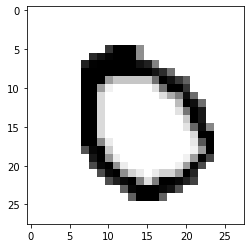

In [95]:
one_image = x_test[0]
plt.imshow(one_image.squeeze(), cmap = plt.cm.gray_r)
print(y_test[0])

In [96]:
model.predict(one_image.reshape(1, 28, 28, 1))

array([[0.10829184, 0.09245615, 0.08156153, 0.08418436, 0.07009254,
        0.10878406, 0.10791186, 0.09842893, 0.12444254, 0.1238462 ]],
      dtype=float32)

In [97]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

320/320 [==============================] - 5s 14ms/step - loss: 2.3049 - accuracy: 0.1062

Test Accuracy: 0.10615234076976776

Test Loss: 2.3048839569091797


## Make predictions on real test set and submit

In [98]:
real_test = pd.read_csv('Kannada-MNIST/test.csv')
real_test.head()
real_test = real_test.iloc[:, 1:].to_numpy()
real_test = real_test/255.
real_test.shape
real_test_2d = real_test.reshape(-1, 28, 28, 1)

In [99]:
sample_submit = pd.read_csv("Kannada-MNIST/sample_submission.csv")
sample_submit.head()

,id,label
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5


In [100]:
predictions = model.predict(real_test_2d)
predictions.shape

sample_submit["label"] = predictions.argmax(axis = 1)

In [101]:
sample_submit.to_csv("submission.csv", index = False)

# Feature Maps Visualization

In [102]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_6 (None, 28, 28, 32)
2 conv2d_7 (None, 14, 14, 64)
4 conv2d_8 (None, 7, 7, 32)


In [103]:
from matplotlib import pyplot

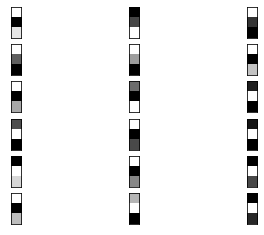

In [115]:
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[ :, j], cmap='gray_r')
		ix += 1
# show the figure
pyplot.show()